# This is program machine learning (IPM Classification) for Study Date Sircle Research and Development Faculty of Informatics

## Problem Scooping

ini jelasin aja permasalahannya apa. Contoh:

IPM berpengaruh terhadap kondisi negara Indonesia. Penjabaran Latar belakang, Rumusan masalah dkk

## Data Acquistion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/My Drive/dataset/ipm.csv')
data.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


## Data Exploration

In [ ]:
data.shape

(2196, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Harapan_Lama_Sekolah,2196.0,12.931498,1.312967,2.95,12.35,12.860,13.5700,17.80
Pengeluaran_Perkapita,2196.0,10323.144353,2664.738311,3975.00,8599.75,10192.500,11670.5000,23888.00
Rerata_Lama_Sekolah,2196.0,8.291585,1.611256,0.85,7.39,8.180,9.1800,12.83
Usia_Harapan_Hidup,2196.0,69.467418,3.437536,54.82,67.21,69.785,71.7125,77.73


In [ ]:
data.isnull().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

In [ ]:
data['IPM'].value_counts()

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


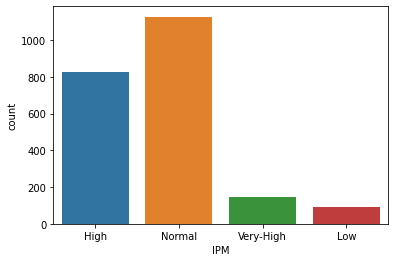

In [ ]:
sns.countplot(data['IPM']) 

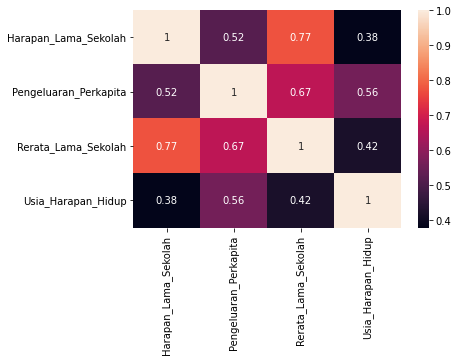

In [ ]:
sns.heatmap(data.corr(),annot=True) #annot untuk menampilkan nilai dalam kotaknya

### Declire Dataset

In [ ]:
x = data.drop(columns='IPM', axis=1)
y = data['IPM']

In [ ]:
x.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
0,14.36,9572,9.37,69.96
1,13.90,7148,9.48,65.28
2,14.32,8776,8.68,67.43
3,14.60,8180,8.88,64.40
4,14.01,8030,9.67,68.22


In [ ]:
y

0         High
1       Normal
2       Normal
3       Normal
4       Normal
         ...  
2191       Low
2192       Low
2193       Low
2194      High
2195      High
Name: IPM, Length: 2196, dtype: object

### Split Dataset 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42) #random state agar saat di run ulang, hasilnya tetap sama kyk sebelumnya

In [ ]:
x_train.shape, x_test.shape

((1647, 4), (549, 4))

## Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtree.predict(x_test)

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9489981785063752

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.93      0.94      0.94       208
         Low       1.00      0.96      0.98        24
      Normal       0.97      0.96      0.96       276
   Very-High       0.89      0.95      0.92        41

    accuracy                           0.95       549
   macro avg       0.95      0.95      0.95       549
weighted avg       0.95      0.95      0.95       549



## Prediksi Data Baru

In [ ]:
predict = dtree.predict(np.array([[14.56,8765,8.34,64.34]]))
predict

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Normal'], dtype=object)

In [ ]:
predict = dtree.predict(np.array([[20.56,5565,10.34,84.34]]))
predict

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Low'], dtype=object)

## Save Model Using Pickle

In [ ]:
import pickle

pickle.dump(dtree, open('model-dtree.pkl', 'wb'))

In [ ]:
model = pickle.load(open('model-dtree.pkl', 'rb'))
model.predict(x_test)

array(['Normal', 'High', 'Normal', 'Normal', 'High', 'Normal', 'Low',
       'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High',
       'High', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Low',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Low', 'High',
       'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal',
       'High', 'High', 'Very-High', 'Normal', 'High', 'Normal', 'High',
       'Normal', 'Very-High', 'Normal', 'High', 'Low', 'High', 'Normal',
       'Normal', 'Very-High', 'Normal', 'Normal', 'High', 'Normal',
       'Normal', 'High', 'Normal', 'High', 'Very-High', 'High', 'High',
       'Normal', 'High', 'Normal', 'Normal', 'Normal', 'Normal', 'High',
       'Normal', 'Normal', 'Normal', 'High', 'High', 'Normal', 'Low',
       'Normal', 'Normal', 'Normal', 'High', 'High', 'Very-High', 'High',
       'High', 'Normal', 'High', 'High', 'Normal', 'Normal', 'High',
       'High', 'High', 'Normal', 'High', 'Normal', 'Normal', 'High',
      

SEKIAN TERIMA KASIH